<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](git@github.com:ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [1.0 Introduction to Uncertainty Quantification and Predictive Sciences](https://ndcbe.github.io/cbe67701-uncertainty-quantification/01.00-Introduction-to-Uncertainty-Quantification-and-Predictive-Sciences.html) | [Contents](toc.html) | [2.0 Probability-and-Statistics-Preliminaries](https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.00-Probability-and-Statistics-Preliminaries.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/01.01-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/01.01-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 1.1 Our First Notebook

Created by A. Dowling (adowling@nd.edu)

In [1]:
## import all needed Python libraries here
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd

## 1.1.1 Python Tutorials

We will use primarily Python this semester. Here are some getting started tutorials from Prof. Kantor:
* [Jupyter Notebooks, Python, and Google Colaboratory (CBE20255)](https://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/00.01-Getting-Started-with-Jupyter-Notebooks-and-Python.ipynb)
* [Getting Started with Python and Jupyter Notebooks (CBE30338)](https://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/01.01-Getting-Started-with-Python-and-Jupyter-Notebooks.ipynb)
* [Python Basics (CBE30338)](https://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/01.02-Python-Basics.ipynb)
* [Python Conditionals and Libraries (CBE30338)](https://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/01.03-Python-Conditionals-and-Libraries.ipynb)
* [Python Numeric Integration Revisited (CBE30338)](https://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/01.04-Python-Numeric-Integration-Revisited.ipynb)
* [Getting Started with Pandas (CBE40455)](https://nbviewer.jupyter.org/github/jckantor/CBE40455/blob/master/notebooks/01.04-Getting-Started-with-Pandas.ipynb)

These tutorials come from three separates classes; our apologies for any repetition.

Prof. McClarren has provided supplemental examples in both Python and R. Although it is possible to [run R on Google Colab](https://colab.research.google.com/drive/1BYnnbqeyZAlYnxR9IHC8tpW07EpDeyKR), the steps are a little clunky. If possible, let's try to find popular Python libraries to replace the R examples if possible.

## 1.1.2 Markdown Tutorial

Markdown cells allow us to write text in notebooks. We can also use LaTeX to typeset questions:
    
$$A = \pi r^2$$

In a markdown cell, starting a line with...

*#* creates a title. Please only use this at the top of the notebook.

*##* creates a section title. We recommend organizing your example into 2 to 5 sections.

*###* creates a subsection title.

*####* createa a subsubsection title.

The package [nbpages](https://github.com/jckantor/nbpages) will automatically add numbers to sections, subsections, etc. when publishing to the HTML website. Please do not start titles with a number. Prof. Dowling will run `nbpages`.

Recommended tutorial: [Markdown in Jupyter Notebook](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Please avoid adding HTML code to your markdown cells. HTML code can cause formatting issues with `nbpages`.

## 1.1.3 Installing Packages in Colab

Let's say you want to use a niche Python package. Not a problem. We can add code to automatically detect if a package is available and install it if needed.

In [2]:
## Tip: Please put code like this at the top of your notebook.
# We want all of the module/package installations to start up front

# Packages to interface with your operating system or Colab
import shutil
import sys
import os.path

# Check if Pyomo is available. If not, install it.
if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))
else:
    print("Pyomo found! No need to install.")
    
# Check in Ipopt (solver) is available. If not, install it.
if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    # Check if we are running on Google Colab
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
    # Otherwise, try conda
    else:
        try:
            !conda install -c conda-forge ipopt 
        except:
            pass
else:
    print("Ipopt found! No need to install.")

# Verify Ipopt is now available
assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

# Now import the library Pyomo
from pyomo.environ import *
from pyomo.dae import *

Pyomo found! No need to install.
Ipopt found! No need to install.


## 1.1.4 Advection-Diffusion-Reaction Equation and Heat Transfer Example

Section 1.4 of McClarren (2018) introduces the advection-diffusion-reaction equation as a model problem:

\begin{equation}
\frac{\partial u}{\partial t} + \mathbf{v} \cdot \nabla u = \nabla \cdot \omega \nabla u + R(u), \quad \mathbf{r} \in V, \quad t > 0
\end{equation}

with boundary and initial conditions:

\begin{equation}
u(\mathbf{r},t) = g(\mathbf{r},t) \quad \mathbf{r} \in \partial V, \qquad u(\mathbf{r},0) = f(\mathbf{r})
\end{equation}

Here $u(\mathbf{r},t)$ is a physical property such as temperature, concentration, etc., distributed over spacial domain $V$ and time. $\mathbf{v}$ is the speed of advenction in each direction of $u$, $\omega$ is a diffusion coefficient, and $R(u)$ is a reaction function.

Let's look at **heat transfer** as a concrete example. For this case $u$ is temperature $T$ and there is no reaction thus $R(u) = 0$. The term $\mathbf{v} \cdot \nabla$ is for advection and the term $\nabla \cdot \omega \nabla$ is for diffusion. 

The code below was [originally developed by Prof. Kantor](https://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.03-Heat_Conduction_in_Various_Geometries.ipynb).



### 1.1.4.1 Rescaling the heat equation

Transport of heat in a solid is described by the familiar thermal diffusion model (no advection)

\begin{align*}
\rho C_p\frac{\partial T}{\partial t} & = \nabla\cdot(k\nabla T)
\end{align*}

We'll assume the thermal conductivity $k$ is a constant, and define thermal diffusivity in the conventional way

\begin{align*}
\alpha & = \frac{k}{\rho C_p}
\end{align*}

(Notice $\alpha = \omega$ in the general advection-diffusion-reaction equation.) We will further assume symmetry with respect to all spatial coordinates except $r$ where $r$ extends from $-R$ to $+R$. The boundary conditions are

\begin{align*}
T(t,R) & = T_{\infty} & \forall t > 0 \\
\nabla T(t,0) & = 0 & \forall t \geq 0 
\end{align*}

where we have assumed symmetry with respect to $r$ and uniform initial conditions $T(0, r) = T_0$ for all $0 \leq r \leq R$. Following standard scaling procedures, we introduce the dimensionless variables

\begin{align*}
T' & = \frac{T - T_0}{T_\infty - T_0} \\
r' & = \frac{r}{R} \\
t' & = t \frac{\alpha}{R^2}
\end{align*}

### 1.1.4.2 Dimensionless model

Under these conditions the problem reduces to 

\begin{align*}
\frac{\partial T'}{\partial t'} & = \nabla^2 T'
\end{align*}

with auxiliary conditions

\begin{align*}
T'(0, r') & = 0 & \forall 0 \leq r' \leq 1\\
T'(t', 1) & = 1 & \forall t' > 0\\
\nabla T'(t', 0) & = 0 & \forall t' \geq 0 \\
\end{align*}

which we can specialize to specific geometries.

### 1.1.4.3 Planar coordinates

Suppressing the prime notation, for a slab geometry the model specializes to 

\begin{align*}
\frac{\partial T}{\partial t} & = \frac{\partial^2 T}{\partial r^2}
\end{align*}

with auxiliary conditions

\begin{align*}
T(0, r) & = 0 & \forall 0 \leq r \leq 1 \\
T(t, 1) & = 1 & \forall t > 0\\
\frac{\partial T}{\partial r} (t, 0) & = 0 & \forall t \geq 0 \\
\end{align*}

#### 1.1.4.3.1 Create the model

We will not use Pyomo extensively for the book study; when you ready the code below, just notice the equations match the equations above.

In [3]:
# Create a Pyomo model
m = ConcreteModel()

# Refine the dimensions "r" (position) and "t" (time)
m.r = ContinuousSet(bounds=(0,1))
m.t = ContinuousSet(bounds=(0,2))

# Create the variable T for temperature
m.T = Var(m.t, m.r)

# Define the derivative variables
m.dTdt   = DerivativeVar(m.T, wrt=m.t)
m.dTdr   = DerivativeVar(m.T, wrt=m.r)
m.d2Tdr2 = DerivativeVar(m.T, wrt=(m.r, m.r))

# Define the governing partial differential equation
@m.Constraint(m.t, m.r)
def pde(m, t, r):
    if t == 0:
        return Constraint.Skip
    if r == 0 or r == 1:
        return Constraint.Skip
    return m.dTdt[t,r] == m.d2Tdr2[t,r]

# Define a "dummy" (constant) objective function
m.obj = Objective(expr=1)

# Define the initial condition
m.ic  = Constraint(m.r, rule=lambda m, r:    m.T[0,r] == 0 if r > 0 and r < 1 else Constraint.Skip)

# Define the first boundary condition
m.bc1 = Constraint(m.t, rule=lambda m, t:    m.T[t,1] == 1)

# Define the second boundary condition
m.bc2 = Constraint(m.t, rule=lambda m, t: m.dTdr[t,0] == 0)

#### 1.1.4.3.2 Solve the model

In [4]:
# Apply finite difference approximation in the space domain (r)
TransformationFactory('dae.finite_difference').apply_to(m, nfe=50, scheme='FORWARD', wrt=m.r)

# Apply finite difference approximation in the time domain (t)
TransformationFactory('dae.finite_difference').apply_to(m, nfe=50, scheme='FORWARD', wrt=m.t)

# Solve with Ipopt
SolverFactory('ipopt').solve(m, tee=True).write()

Ipopt 3.12.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    30347
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:    10299
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Tot

#### 1.1.4.3.3 Plotting the solution

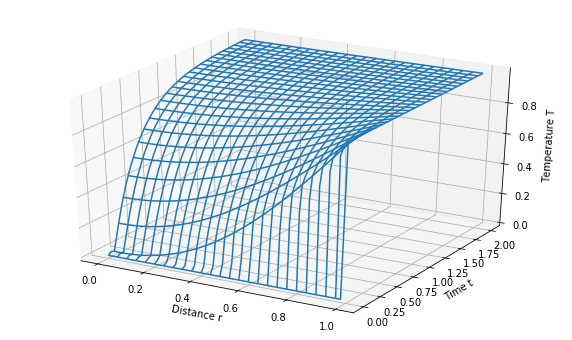

In [5]:
def model_plot(m):
    # extract the elements of space and time domains (which were discretized)
    r = sorted(m.r)
    t = sorted(m.t)

    # Define arrays to store the solution in 2D
    rgrid = np.zeros((len(t), len(r)))
    tgrid = np.zeros((len(t), len(r)))
    Tgrid = np.zeros((len(t), len(r)))

    # Extract the solution from the Pyomo model,
    # put into the numpy arrays
    for i in range(0, len(t)):
        for j in range(0, len(r)):
            rgrid[i,j] = r[j]
            tgrid[i,j] = t[i]
            Tgrid[i,j] = m.T[t[i], r[j]].value

    # Create a 3D plot
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlabel('Distance r')
    ax.set_ylabel('Time t')
    ax.set_zlabel('Temperature T')
    p = ax.plot_wireframe(rgrid, tgrid, Tgrid)

# Call the function
model_plot(m)

## 1.1.5 Loading Data Using Pandas

Inside the folder `/notebooks/data/` is the text file `Stock_Data.csv`. This contains daily closing prices for 5 index funds over 5 years:

| Symbol | Name |
|-|-|
| GSPC | S&P 500 | 
| DJI | Dow Jones Industrial Average | 
| IXIC | NASDAQ Composite | 
| RUT | Russell 2000 |
| VIX | CBOE Volatility Index |

Let's import the data with Pandas:

In [6]:
stock_data = pd.read_csv('./data/Stock_Data.csv')

Now let's look at the first 5 rows of the dataset:

In [7]:
stock_data.head()

,DJI,GSPC,IXIC,RUT,VIX
0,14447.75000,1551.689941,3235.300049,945.849976,13.74
1,14559.65039,1563.770020,3252.479980,949.820007,12.77
2,14526.16016,1562.849976,3256.520020,950.239990,13.15
3,14578.54004,1569.189941,3267.520020,951.539978,12.70
4,14572.84961,1562.170044,3239.169922,938.789978,13.58


We can also calculate summary statistics:

In [8]:
stock_data.describe()

,DJI,GSPC,IXIC,RUT,VIX
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,18308.909006,2090.507514,4998.311675,1220.743042,14.550937
std,2683.633650,288.577349,986.364011,155.571503,3.845423
min,14447.750000,1541.609985,3166.360107,901.510010,9.140000
25%,16447.775390,1894.469970,4334.710205,1120.449951,12.130000
50%,17719.919920,2068.530029,4891.430176,1181.410034,13.710000
75%,19812.250000,2258.800049,5441.530029,1353.050049,15.910000
max,26616.710940,2872.870117,7588.319824,1610.709961,40.740002


Finally, let's plot the daily closing price for the Dow Jones Industry Average.

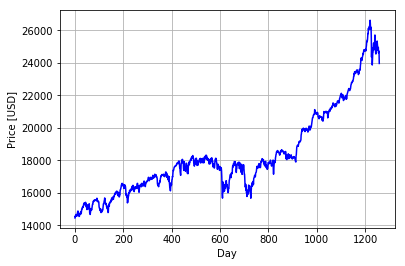

In [9]:
plt.plot(stock_data["DJI"],color="blue")
plt.xlabel("Day")
plt.ylabel("Price [USD]")
plt.grid(True)
plt.show()

Unfortunately, I did not record the correspond calendar date for the first day in the dataset; otherwise, we could have modified the horizonal axis to show dates.

<!--NAVIGATION-->
< [1.0 Introduction to Uncertainty Quantification and Predictive Sciences](https://ndcbe.github.io/cbe67701-uncertainty-quantification/01.00-Introduction-to-Uncertainty-Quantification-and-Predictive-Sciences.html) | [Contents](toc.html) | [2.0 Probability-and-Statistics-Preliminaries](https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.00-Probability-and-Statistics-Preliminaries.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/01.01-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/01.01-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>